In [1]:
import pickle
import gensim.downloader as api
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import euclidean_distances

import matplotlib.pyplot as plt
import colorcet
import seaborn as sns
from nltk import FreqDist
from sklearn.decomposition import KernelPCA
from pyemd import emd_samples
from pyemd import emd


In [2]:
with open("../data/concs_labeled.pickle", "rb") as f:
    concs_labeled = pickle.load(f)

In [3]:
concs = [conc[0] for conc in concs_labeled]
labels = [conc[1] for conc in concs_labeled]
years =  [int(conc[2]) for conc in concs_labeled]

In [4]:
markers = ["o" if y<=2017 else "x" for y in years ]
len([el for el in markers if el=="x"])

4478

In [5]:
with open("../data/large_data/distance_matrix.pickle", "rb") as f:
    distance_matrix = pickle.load(f)

In [6]:
unique_labels = list(set(labels))
unique_labels

['moderate',
 'exclusive',
 'right-wing',
 'nationalist',
 'left-wing',
 'authoritatian',
 'nativist',
 'neoliberal',
 'inclusive',
 'radical']

In [24]:
year_types = []
for year in range(2011,2021):
    #for label in unique_labels:
    year_concs_freqs = dict(FreqDist([conc[1] for conc in concs_labeled if int(conc[2])==year]))
    year_concs_freqs["year"] = year
    year_types.append(year_concs_freqs)


In [27]:
year_types

[{'nationalist': 37,
  'right-wing': 195,
  'radical': 6,
  'neoliberal': 10,
  'inclusive': 2,
  'authoritatian': 3,
  'exclusive': 7,
  'left-wing': 16,
  'moderate': 3,
  'year': 2011},
 {'nationalist': 43,
  'neoliberal': 10,
  'right-wing': 13,
  'exclusive': 6,
  'left-wing': 6,
  'inclusive': 10,
  'authoritatian': 10,
  'moderate': 1,
  'radical': 26,
  'year': 2012},
 {'left-wing': 26,
  'radical': 13,
  'right-wing': 102,
  'nationalist': 21,
  'exclusive': 6,
  'moderate': 9,
  'authoritatian': 50,
  'inclusive': 5,
  'neoliberal': 9,
  'year': 2013},
 {'radical': 36,
  'right-wing': 69,
  'nationalist': 36,
  'left-wing': 28,
  'neoliberal': 15,
  'exclusive': 34,
  'inclusive': 10,
  'authoritatian': 12,
  'nativist': 4,
  'moderate': 35,
  'year': 2014},
 {'right-wing': 85,
  'radical': 20,
  'nationalist': 47,
  'inclusive': 22,
  'left-wing': 40,
  'neoliberal': 68,
  'authoritatian': 21,
  'exclusive': 29,
  'nativist': 6,
  'year': 2015},
 {'left-wing': 49,
  'radical

In [29]:
year_types_df = pd.DataFrame(year_types)
year_types_df["left-wing"]

0     16
1      6
2     26
3     28
4     40
5     49
6    169
7     97
8    146
9    154
Name: left-wing, dtype: int64

In [7]:
palette = sns.color_palette("tab10", len(unique_labels))
labels_ordered = [tup[0] for tup in FreqDist(labels).most_common()]
color_dict = dict(zip(labels_ordered, palette))
labels_colors = [color_dict[l] for l in labels]

(-0.45, 9.45, -30.25, 657.25)

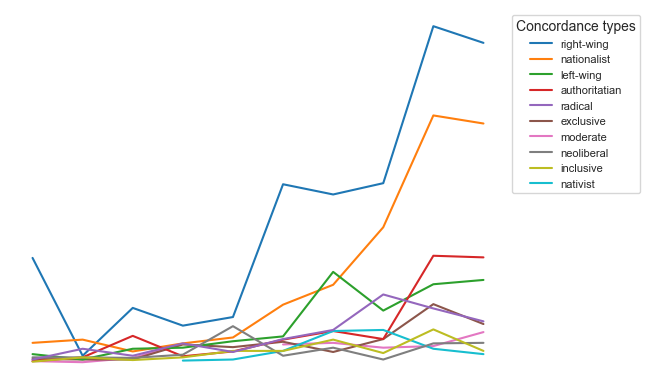

In [37]:
fig, ax = plt.subplots()
for label, color in zip(unique_labels, palette):
    year_types_df[label].plot(ax=ax, color=color_dict[label])

markers = [plt.Line2D([0,0],[0,0], color=color, linestyle='-') for color in palette]
ax.legend(markers, labels_ordered, numpoints=1, title="Concordance types", fontsize=8, bbox_to_anchor=(1,1), loc="upper left")
ax.axis("off")

In [8]:
distance_matrix.shape

(7380, 7380)

In [10]:
tsne = TSNE(n_components=2, perplexity=50, init="random", learning_rate="auto", random_state=1)
distances_2d = tsne.fit_transform(distance_matrix)

In [14]:
from matplotlib import markers

(-77.30987854003907, 63.99191589355469, -72.61669960021973, 84.59505500793458)

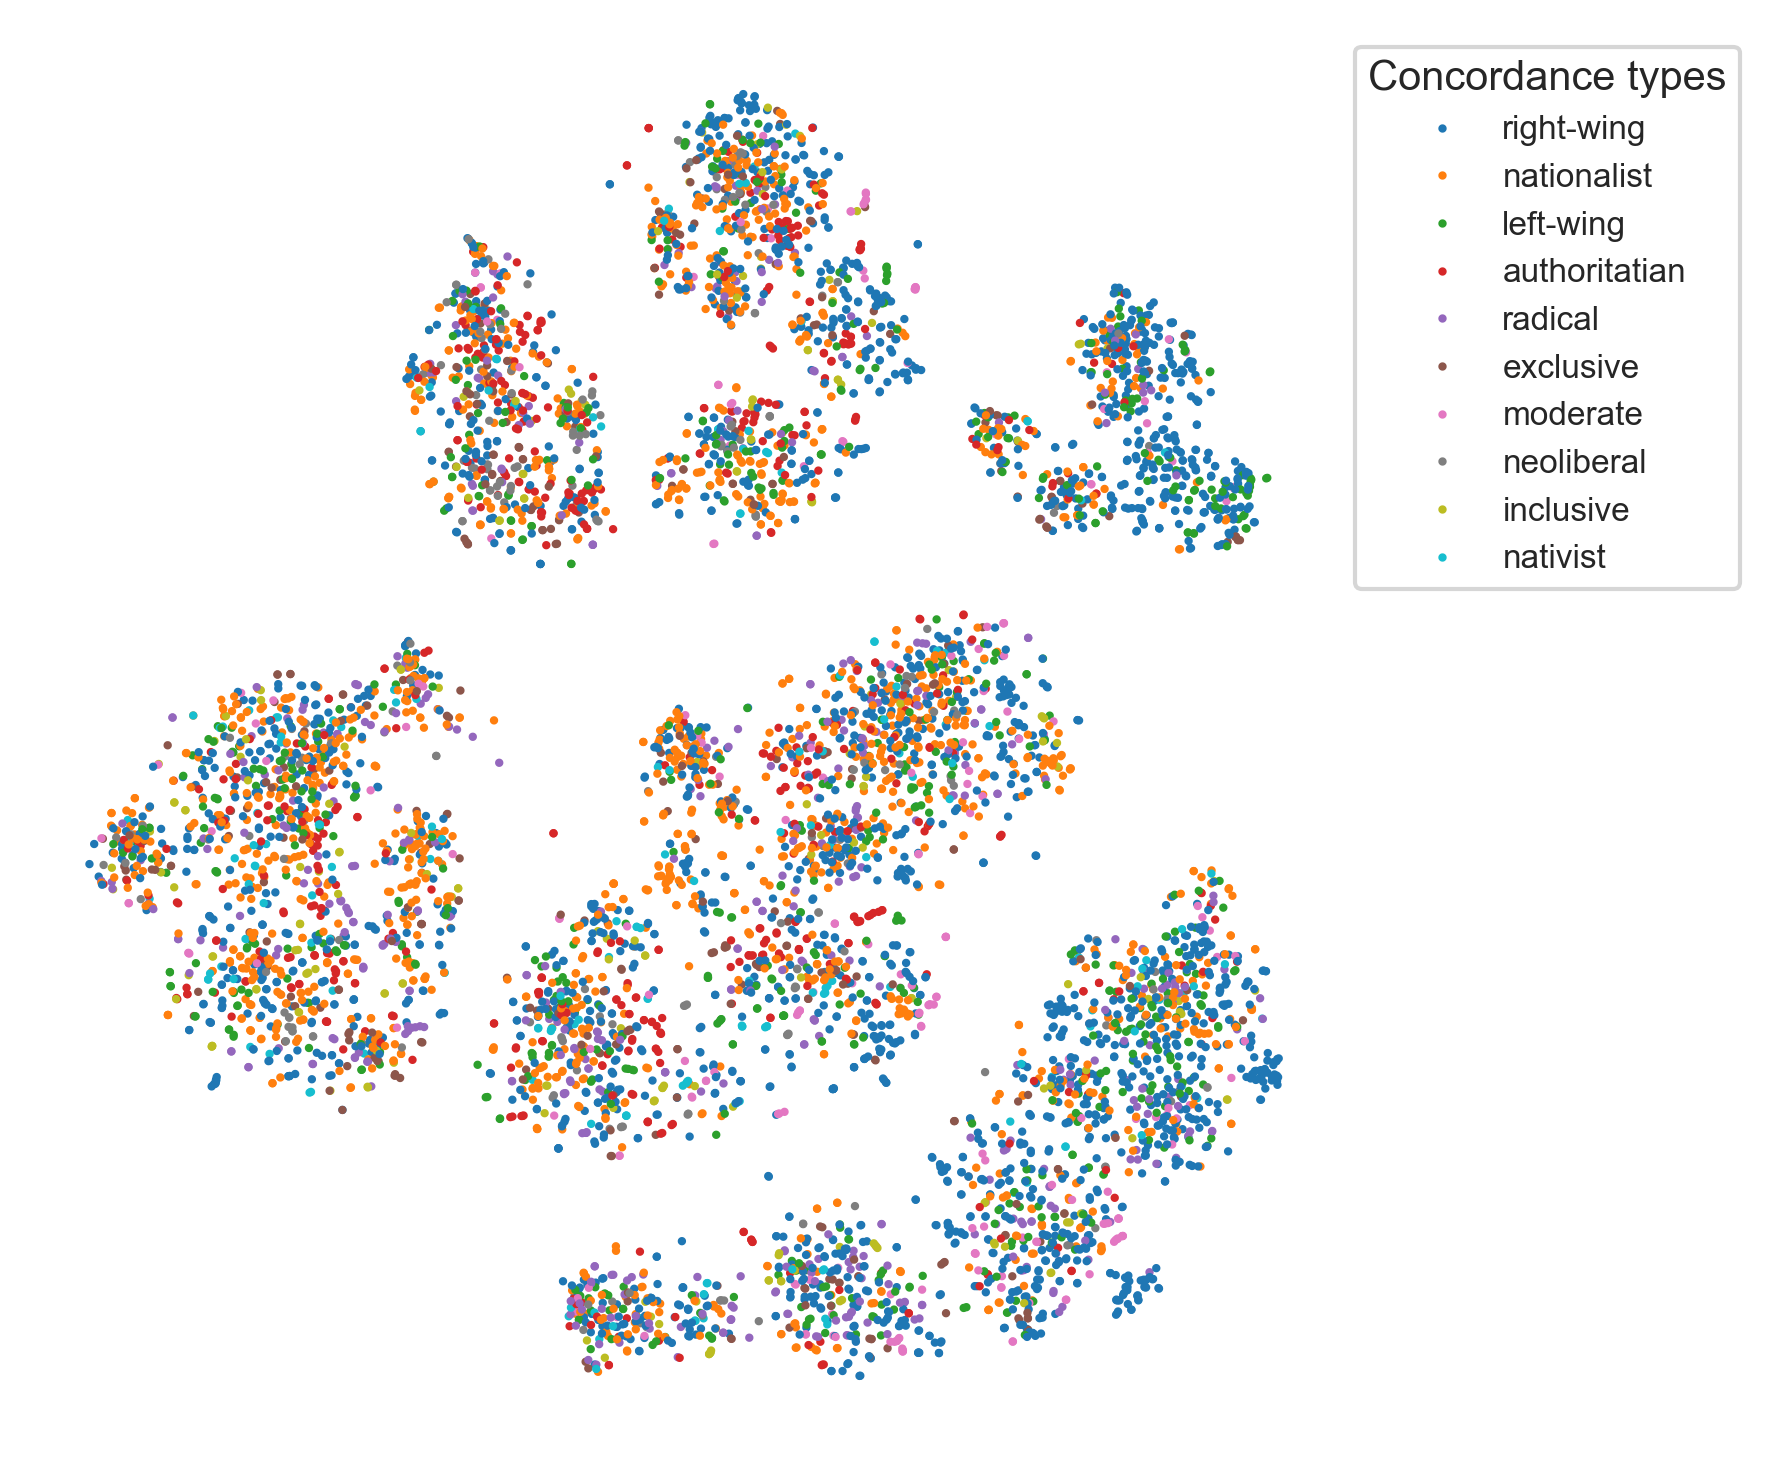

In [11]:
fig, ax = plt.subplots(figsize=(6,5), dpi=300, tight_layout=True)

ax.scatter(distances_2d[:, 0], distances_2d[:, 1], marker="o", s=1, c=labels_colors)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', markersize=1, linestyle='') for color in palette]
ax.legend(markers, labels_ordered, numpoints=1, title="Concordance types", fontsize=8, bbox_to_anchor=(1,1), loc="upper left")
ax.axis("off")

(-75.95043487548828, 63.927180480957034, -71.27742729187011, 82.65743980407714)

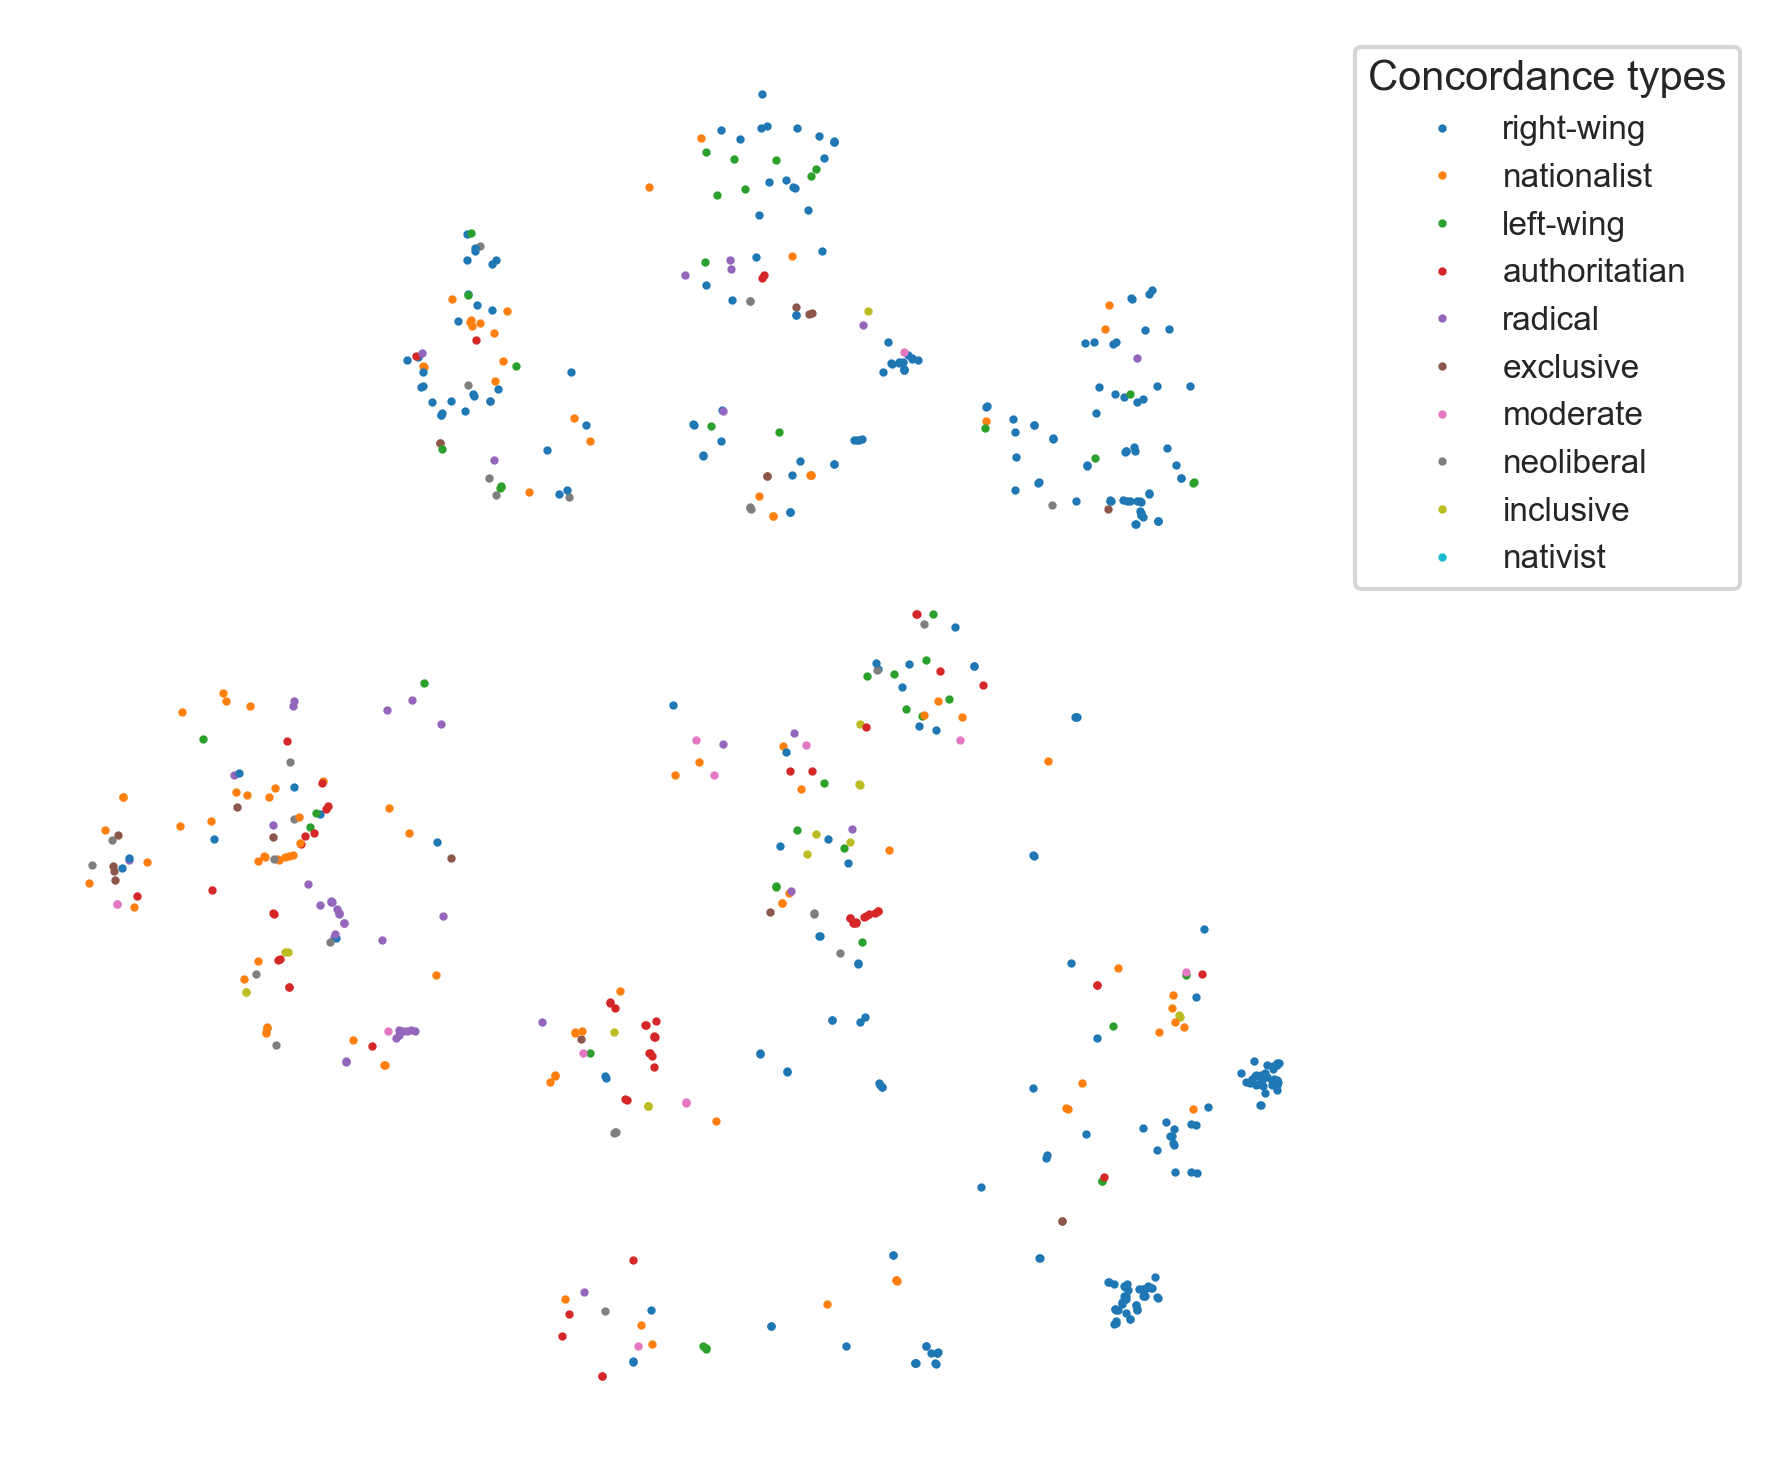

In [12]:
fig, ax = plt.subplots(figsize=(6,5), dpi=300, tight_layout=True)

for year, x, y, color in zip(years, distances_2d[:, 0], distances_2d[:, 1], labels_colors):
    if year <= 2013:
        ax.scatter(x, y, marker="o", s=1, color=color)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', markersize=1, linestyle='') for color in palette]
ax.legend(markers, labels_ordered, numpoints=1, title="Concordance types", fontsize=8, bbox_to_anchor=(1,1), loc="upper left")
ax.axis("off")

(-69.16297473907471, 69.57681217193604, -82.4125, 84.80059204101562)

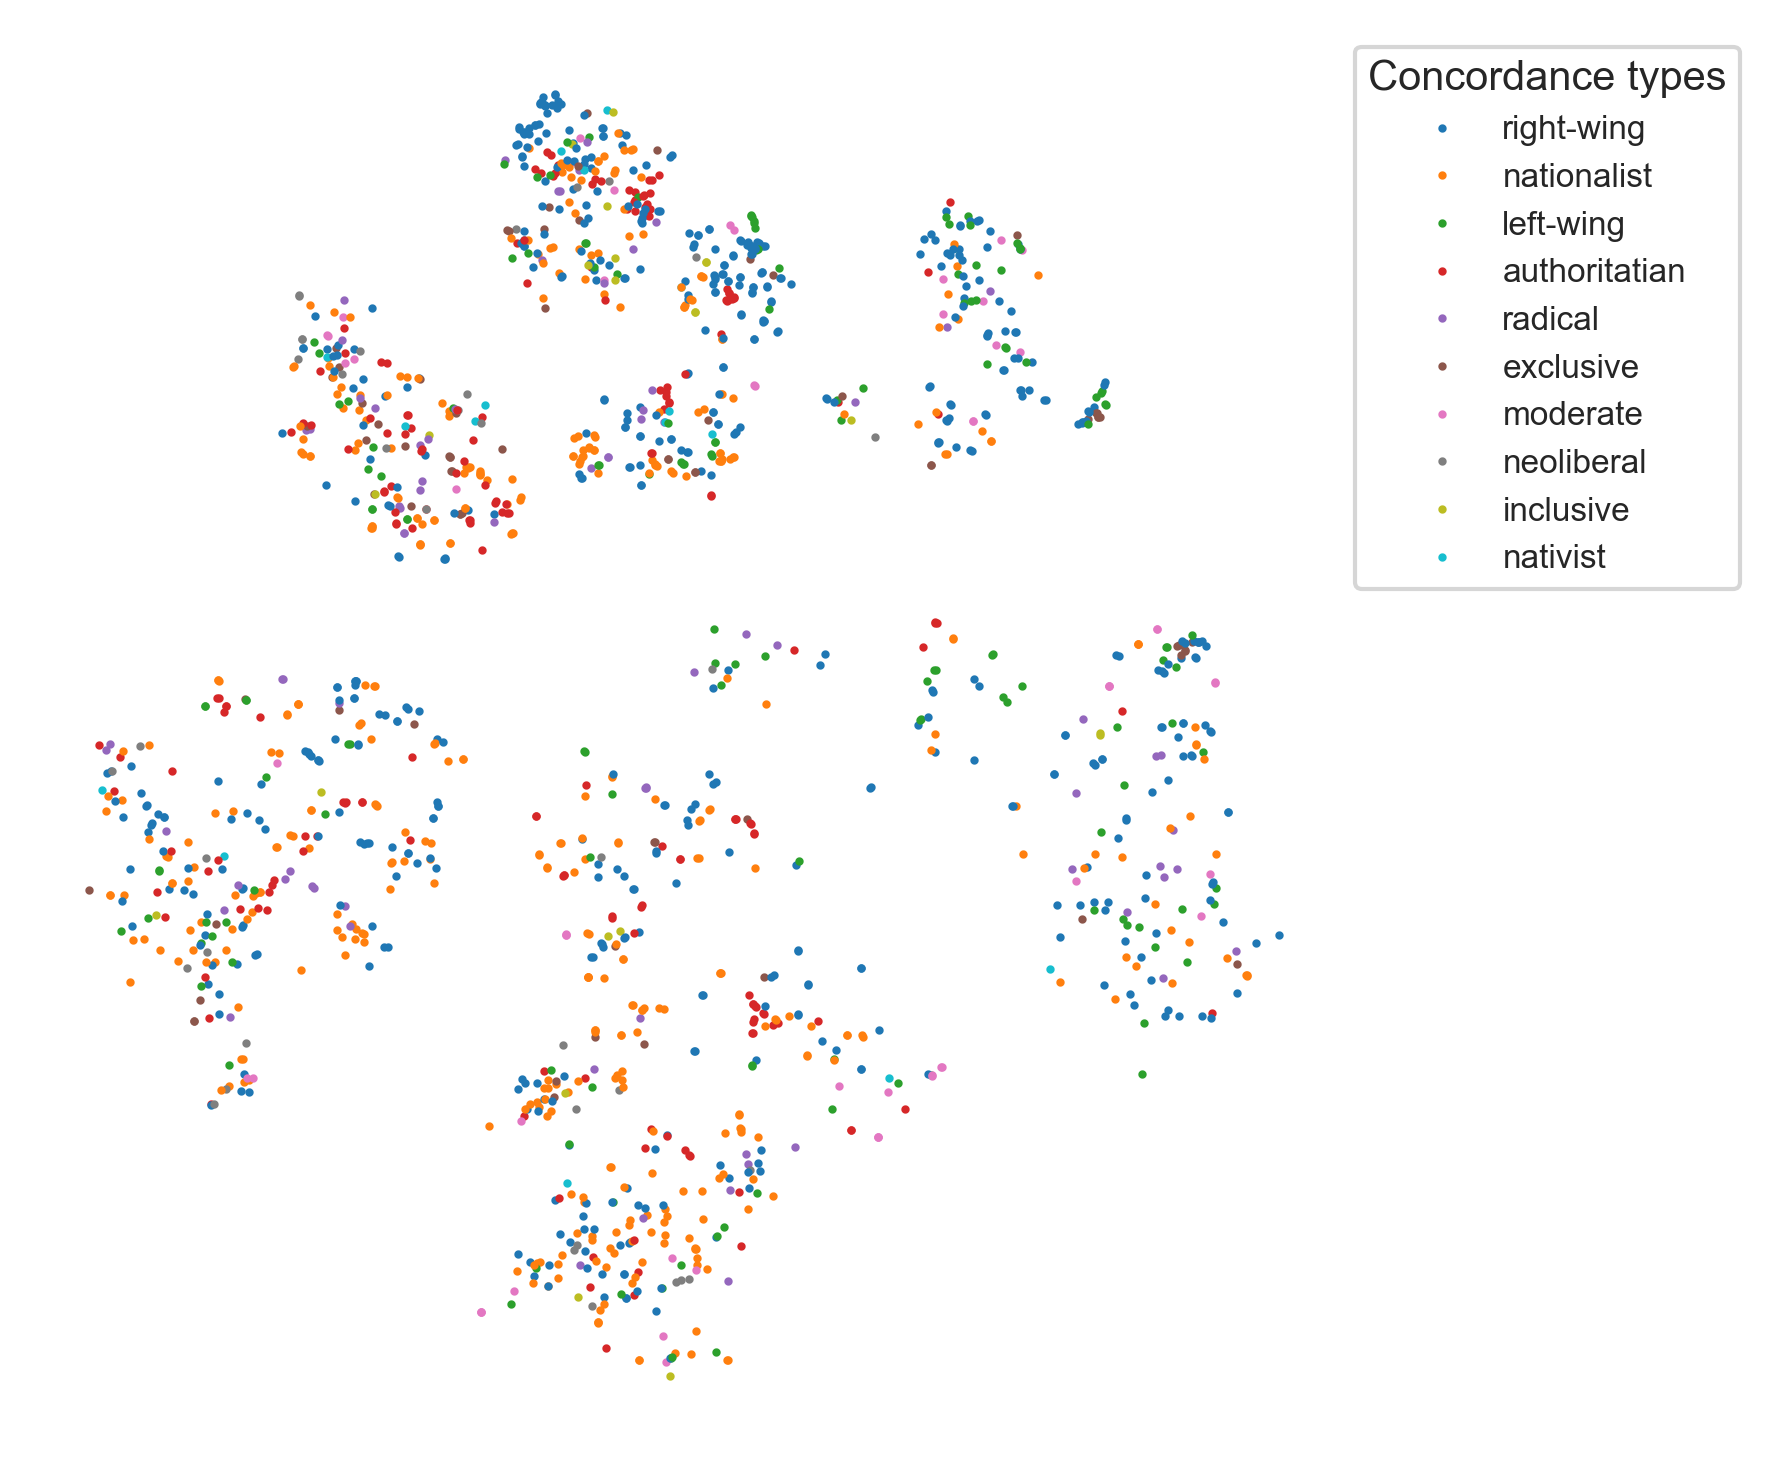

In [215]:
fig, ax = plt.subplots(figsize=(6,5), dpi=300, tight_layout=True)

for year, x, y, color in zip(years, distances_2d[:, 0], distances_2d[:, 1], labels_colors):
    if year == 2020:
        ax.scatter(x, y, marker="o", s=1, color=color)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', markersize=1, linestyle='') for color in palette]
ax.legend(markers, labels_ordered, numpoints=1, title="Concordance types", fontsize=8, bbox_to_anchor=(1,1), loc="upper left")
ax.axis("off")